# Data Cleaning and Consistency Checks

# Table of Contents

##### 1. Import libraries and data
##### 2. Check data shape, structure, and basic descriptive statistics
##### 3. Consistency Checks
    3.1 Missing values
    3.2 Mixed-type data
    3.3 Update data types
    3.4 Duplicates
##### 4. Data Wrangling
    4.1 Drop columns if necessary
##### 5. Frequency Distributions and Outliers
    5.1 Frequency Tables
    5.2 Identifying and Removing Outliers/innaccurate data
##### 6. Check shape, structure and basic descriptive statistics after updates
##### 7. Export Data


# 1. Import libraries and data

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [7]:
# Set path
path = r'C:\Users\ashle\Documents\08-2024 King County, Washington_House Sales Analysis'

# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'kc_house_data.csv'), index_col = False)

# 2. Check shape, structure of data, and basic descriptive statistics

In [9]:
df.shape

(21613, 21)

In [10]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [11]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [110]:
df.describe().to_clipboard()

In [108]:
df.describe()

date         price      bedrooms  \
count                          21612  2.161200e+04  21612.000000   
mean   2014-10-29 04:46:26.451971328  5.400835e+05      3.369471   
min              2014-05-02 00:00:00  7.500000e+04      0.000000   
25%              2014-07-22 00:00:00  3.218375e+05      3.000000   
50%              2014-10-16 00:00:00  4.500000e+05      3.000000   
75%              2015-02-17 00:00:00  6.450000e+05      4.000000   
max              2015-05-27 00:00:00  7.700000e+06     11.000000   
std                              NaN  3.671351e+05      0.907982   

          bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count  21612.000000  21612.000000  2.161200e+04  21612.000000  21612.000000   
mean       2.114774   2079.921016  1.510739e+04      1.494332      0.007542   
min        0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1426.500000  5.040000e+03      1.000000      0.000000   
50%        2.250000   1910.000000  7.619000e+03      1.500000      0.000000   
75%        2.500000   2550.000000  1.068825e+04      2.000000      0.000000   
max        8.000000  13540.000000  1.651359e+06      3.500000      1.000000   
std        0.770177    918.456818  4.142142e+04      0.539991      0.086519   

               view     condition         grade    sqft_above  sqft_basement  \
count  21612.000000  21612.000000  21612.000000  21612.000000   21612.000000   
mean       0.234314      3.409356      7.656904   1788.425319     291.495697   
min        0.000000      1.000000      1.000000    290.000000       0.000000   
25%        0.000000      3.000000      7.000000   1190.000000       0.000000   
50%        0.000000      3.000000      7.000000   1560.000000       0.000000   
75%        0.000000      4.000000      8.000000   2210.000000     560.000000   
max        4.000000      5.000000     13.000000   9410.000000    4820.000000   
std        0.766334      0.650668      1.175477    828.094487     442.580931   

           yr_built  yr_renovated       zipcode           lat          long  \
count  21612.000000  21612.000000  21612.000000  21612.000000  21612.000000   
mean    1971.006247     84.406163  98077.938645     47.560047   -122.213891   
min     1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%     1951.000000      0.000000  98033.000000     47.470975   -122.328000   
50%     1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%     1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max     2015.000000   2015.000000  98199.000000     47.777600   -121.315000   
std       29.373636    401.688123     53.505993      0.138564      0.140829   

       sqft_living15     sqft_lot15  
count   21612.000000   21612.000000  
mean     1986.582871   12768.828984  
min       399.000000     651.000000  
25%      1490.000000    5100.000000  
50%      1840.000000    7620.000000  
75%      2360.000000   10083.250000  
max      6210.000000  871200.000000  
std       685.392610   27304.756179

In [13]:
df['date'].count()

21613

# 3. Consistency Checks

## 3.1 Missing values

In [16]:
# Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

## 3.2 Mixed-type data

In [19]:
# Check for mixed-type data

for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird]) > 0:
        print (col)
    else: 
        print('There is no mixed-type data')

There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data


## 3.3 Update data types

In [21]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [22]:
# Update 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [23]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [24]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## 3.4 Duplicates

In [26]:
# Create subset 'dups' to hold any duplicated rows in the dataframe. 
df_dups = df[df.duplicated()]

# If df_dups returns empty, there are no duplicates. 
# If df_dups returns values, those are the duplicates. 

df_dups

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

There are no duplicates. 

# 4. Data Wrangling

## 4.1 Drop columns if necessary

In [30]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [31]:
# Drop 'id' column as it's not relevant to analysis. 
df = df.drop(columns=['id'])

In [32]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

# 5. Frequency Distributions and Outliers

## 5.1 Frequency Tables

In [35]:
df['date'].value_counts()

date
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64

In [36]:
df['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [37]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [38]:
df['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

In [39]:
df['sqft_lot'].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
25248      1
9934       1
9142       1
24330      1
1076       1
Name: count, Length: 9782, dtype: int64

In [40]:
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [41]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [42]:
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [43]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [44]:
df['sqft_above'].value_counts()

sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: count, Length: 946, dtype: int64

In [45]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [46]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [47]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [48]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [49]:
df['sqft_living15'].value_counts()

sqft_living15
1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
2054      1
3736      1
4950      1
2728      1
2927      1
Name: count, Length: 777, dtype: int64

In [50]:
df['sqft_lot15'].value_counts()

sqft_lot15
5000     427
4000     357
6000     289
7200     211
4800     145
        ... 
25927      1
35943      1
5107       1
1514       1
2007       1
Name: count, Length: 8689, dtype: int64

## 5.2 Identifying and Removing Outliers/innaccurate data

<function matplotlib.pyplot.show(close=None, block=None)>

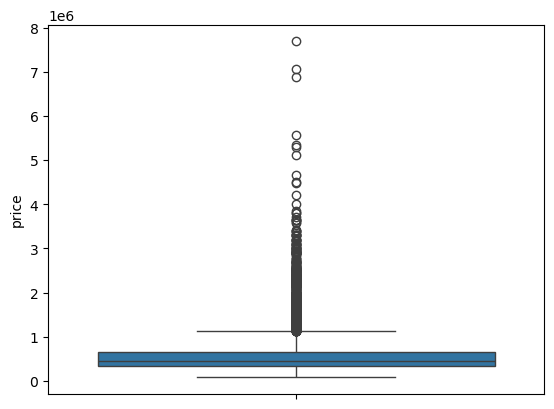

In [52]:
# Create boxplot for price variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df['price'])
title = 'Price'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

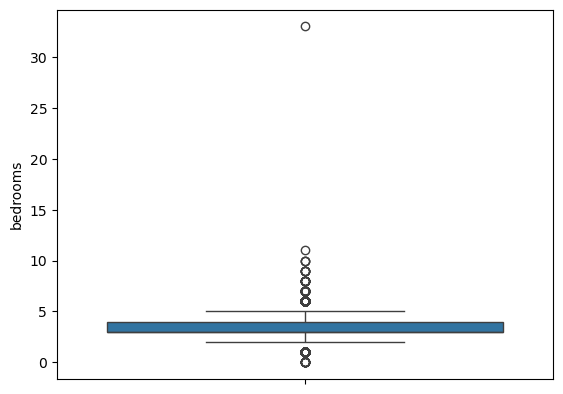

In [53]:
# Create boxplot for bedrooms variable

sns.boxplot(data=df['bedrooms'])
plt.show

In [54]:
# Drop record containing outlier with 33 bedrooms. 
df.drop(df[df.bedrooms == 33].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

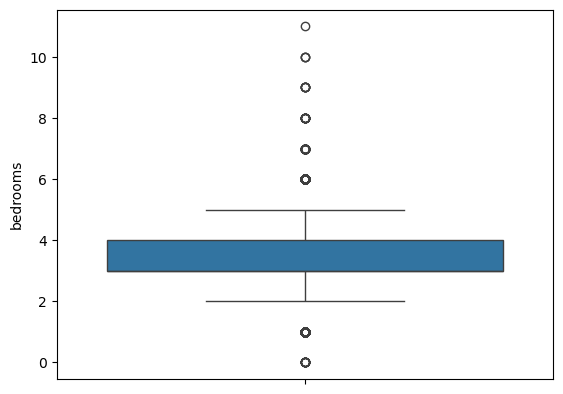

In [55]:
sns.boxplot(data=df['bedrooms'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

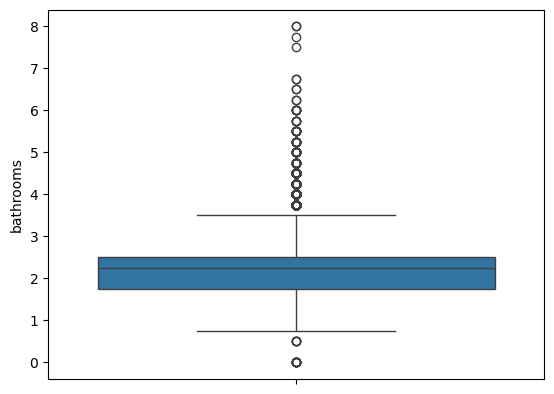

In [56]:
# Create boxplot for bathrooms variable

sns.boxplot(data=df['bathrooms'])
plt.show

# 6. Check shape, structure and basic descriptive statistics after updates

In [58]:
df.shape

(21612, 20)

In [59]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [60]:
df.describe().to_clipboard()

# 7. Export Data

In [62]:
# Export Data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.csv'), index=False)